In [1]:
from pythtb import TBModel  # import TB model class
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# define lattice vectors
lat = [[1.0, 0.0], [0.5, np.sqrt(3.0) / 2.0]]
# define coordinates of orbitals
orb = [[1.0 / 3.0, 1.0 / 3.0], [2.0 / 3.0, 2.0 / 3.0]]

In [3]:
# make two dimensional tight-binding Haldane model
my_model = TBModel(2, 2, lat, orb)

# set model parameters
delta = 0.0
t = -1.0
t2 = 0.15 * np.exp((1.0j) * np.pi / 2.0)
t2c = t2.conjugate()

# set on-site energies
my_model.set_onsite([-delta, delta])
# set hoppings (one for each connected pair of orbitals)
# (amplitude, i, j, [lattice vector to cell containing j])
my_model.set_hop(t, 0, 1, [0, 0])
my_model.set_hop(t, 1, 0, [1, 0])
my_model.set_hop(t, 1, 0, [0, 1])
# add second neighbour complex hoppings
my_model.set_hop(t2, 0, 0, [1, 0])
my_model.set_hop(t2, 1, 1, [1, -1])
my_model.set_hop(t2, 1, 1, [0, 1])
my_model.set_hop(t2c, 1, 1, [1, 0])
my_model.set_hop(t2c, 0, 0, [1, -1])
my_model.set_hop(t2c, 0, 0, [0, 1])

In [4]:
print(my_model)

----------------------------------------
       Tight-binding model report       
----------------------------------------
r-space dimension           = 2
k-space dimension           = 2
number of spin components   = 1
periodic directions         = [0, 1]
number of orbitals          = 2
number of electronic states = 2

Lattice vectors (Cartesian):
  # 0 ===> [ 1.000 ,    0   ]
  # 1 ===> [ 0.500 ,  0.866 ]
Orbital vectors (dimensionless):
  # 0 ===> [ 0.333 ,  0.333 ]
  # 1 ===> [ 0.667 ,  0.667 ]
Site energies:
  # 0 ===> -0.000 
  # 1 ===>  0.000 
Hoppings:
  < 0 | H | 1 + [ 0.0 ,  0.0 ] >  ===> -1.0000
  < 1 | H | 0 + [ 1.0 ,  0.0 ] >  ===> -1.0000
  < 1 | H | 0 + [ 0.0 ,  1.0 ] >  ===> -1.0000
  < 0 | H | 0 + [ 1.0 ,  0.0 ] >  ===> 0.0000+0.1500j
  < 1 | H | 1 + [ 1.0 , -1.0 ] >  ===> 0.0000+0.1500j
  < 1 | H | 1 + [ 0.0 ,  1.0 ] >  ===> 0.0000+0.1500j
  < 1 | H | 1 + [ 1.0 ,  0.0 ] >  ===> 0.0000-0.1500j
  < 0 | H | 0 + [ 1.0 , -1.0 ] >  ===> 0.0000-0.1500j
  < 0 | H | 0 + [ 0.0 ,

In [5]:
# cutout finite model first along direction x with no PBC
tmp_model = my_model.cut_piece(10, 0, glue_edgs=False)

print(tmp_model)

----------------------------------------
       Tight-binding model report       
----------------------------------------
r-space dimension           = 2
k-space dimension           = 1
number of spin components   = 1
periodic directions         = [1]
number of orbitals          = 20
number of electronic states = 20

Lattice vectors (Cartesian):
  # 0 ===> [ 1.000 ,    0   ]
  # 1 ===> [ 0.500 ,  0.866 ]
Orbital vectors (dimensionless):
  # 0 ===> [ 0.333 ,  0.333 ]
  # 1 ===> [ 0.667 ,  0.667 ]
  # 2 ===> [ 1.333 ,  0.333 ]
  # 3 ===> [ 1.667 ,  0.667 ]
  # 4 ===> [ 2.333 ,  0.333 ]
  # 5 ===> [ 2.667 ,  0.667 ]
  # 6 ===> [ 3.333 ,  0.333 ]
  # 7 ===> [ 3.667 ,  0.667 ]
  # 8 ===> [ 4.333 ,  0.333 ]
  # 9 ===> [ 4.667 ,  0.667 ]
  # 10 ===> [ 5.333 ,  0.333 ]
  # 11 ===> [ 5.667 ,  0.667 ]
  # 12 ===> [ 6.333 ,  0.333 ]
  # 13 ===> [ 6.667 ,  0.667 ]
  # 14 ===> [ 7.333 ,  0.333 ]
  # 15 ===> [ 7.667 ,  0.667 ]
  # 16 ===> [ 8.333 ,  0.333 ]
  # 17 ===> [ 8.667 ,  0.667 ]
  # 18 ===

In [6]:
# cutout also along y direction with no PBC
fin_model = tmp_model.cut_piece(10, 1, glue_edgs=False)
print(fin_model)

----------------------------------------
       Tight-binding model report       
----------------------------------------
r-space dimension           = 2
k-space dimension           = 0
number of spin components   = 1
periodic directions         = []
number of orbitals          = 200
number of electronic states = 200

Lattice vectors (Cartesian):
  # 0 ===> [ 1.000 ,    0   ]
  # 1 ===> [ 0.500 ,  0.866 ]
Orbital vectors (dimensionless):
  # 0 ===> [ 0.333 ,  0.333 ]
  # 1 ===> [ 0.667 ,  0.667 ]
  # 2 ===> [ 1.333 ,  0.333 ]
  # 3 ===> [ 1.667 ,  0.667 ]
  # 4 ===> [ 2.333 ,  0.333 ]
  # 5 ===> [ 2.667 ,  0.667 ]
  # 6 ===> [ 3.333 ,  0.333 ]
  # 7 ===> [ 3.667 ,  0.667 ]
  # 8 ===> [ 4.333 ,  0.333 ]
  # 9 ===> [ 4.667 ,  0.667 ]
  # 10 ===> [ 5.333 ,  0.333 ]
  # 11 ===> [ 5.667 ,  0.667 ]
  # 12 ===> [ 6.333 ,  0.333 ]
  # 13 ===> [ 6.667 ,  0.667 ]
  # 14 ===> [ 7.333 ,  0.333 ]
  # 15 ===> [ 7.667 ,  0.667 ]
  # 16 ===> [ 8.333 ,  0.333 ]
  # 17 ===> [ 8.667 ,  0.667 ]
  # 18 ==

In [7]:
# cutout finite model first along direction x with PBC
tmp_model_half = my_model.cut_piece(10, 0, glue_edgs=True)
# cutout also along y direction with no PBC
fin_model_half = tmp_model_half.cut_piece(10, 1, glue_edgs=False)
print(fin_model_half)

----------------------------------------
       Tight-binding model report       
----------------------------------------
r-space dimension           = 2
k-space dimension           = 0
number of spin components   = 1
periodic directions         = []
number of orbitals          = 200
number of electronic states = 200

Lattice vectors (Cartesian):
  # 0 ===> [ 1.000 ,    0   ]
  # 1 ===> [ 0.500 ,  0.866 ]
Orbital vectors (dimensionless):
  # 0 ===> [ 0.333 ,  0.333 ]
  # 1 ===> [ 0.667 ,  0.667 ]
  # 2 ===> [ 1.333 ,  0.333 ]
  # 3 ===> [ 1.667 ,  0.667 ]
  # 4 ===> [ 2.333 ,  0.333 ]
  # 5 ===> [ 2.667 ,  0.667 ]
  # 6 ===> [ 3.333 ,  0.333 ]
  # 7 ===> [ 3.667 ,  0.667 ]
  # 8 ===> [ 4.333 ,  0.333 ]
  # 9 ===> [ 4.667 ,  0.667 ]
  # 10 ===> [ 5.333 ,  0.333 ]
  # 11 ===> [ 5.667 ,  0.667 ]
  # 12 ===> [ 6.333 ,  0.333 ]
  # 13 ===> [ 6.667 ,  0.667 ]
  # 14 ===> [ 7.333 ,  0.333 ]
  # 15 ===> [ 7.667 ,  0.667 ]
  # 16 ===> [ 8.333 ,  0.333 ]
  # 17 ===> [ 8.667 ,  0.667 ]
  # 18 ==

In [ ]:
# solve finite models
evals, evecs = fin_model.solve_ham(return_eigvecs=True)
evals_half, evecs_half = fin_model_half.solve_ham(return_eigvecs=True)

print(evals.shape, evals_half.shape)
print(evecs.shape, evecs_half.shape)

(200,) (200,)
(200, 200) (200, 200)


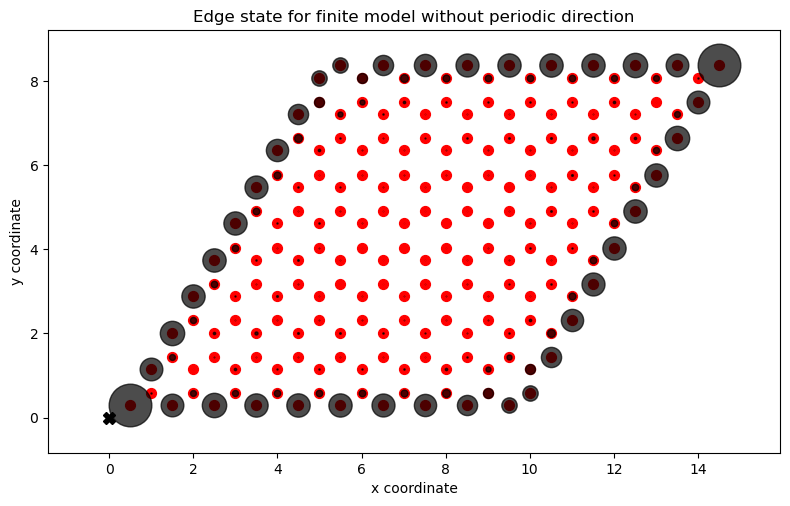

In [11]:
# pick index of state in the middle of the gap
ed = fin_model.get_num_orbitals() // 2

# draw one of the edge states in both cases
(fig, ax) = fin_model.visualize(proj_plane=[0, 1], eig_dr=evecs[ed, :], draw_hoppings=False)

ax.set_title("Edge state for finite model without periodic direction")
ax.set_xlabel("x coordinate")
ax.set_ylabel("y coordinate")
fig.tight_layout()

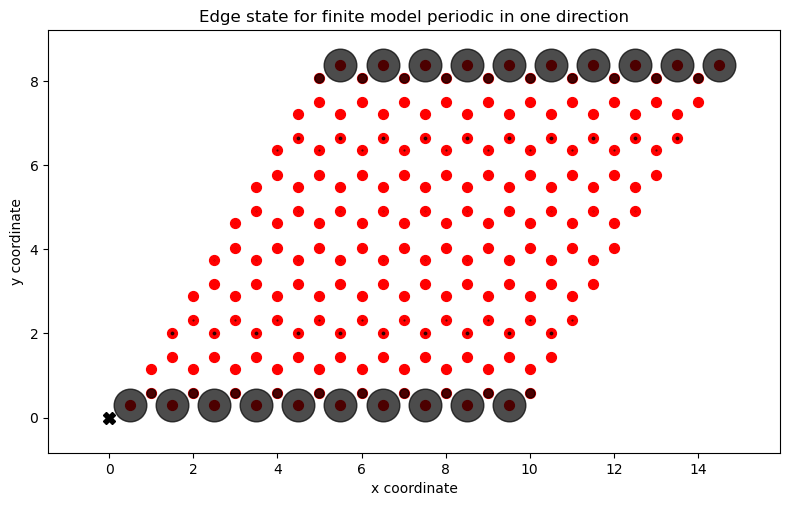

In [12]:
(fig, ax) = fin_model_half.visualize(
    proj_plane=[0, 1], eig_dr=evecs_half[ed, :], draw_hoppings=False
)
ax.set_title("Edge state for finite model periodic in one direction")
ax.set_xlabel("x coordinate")
ax.set_ylabel("y coordinate")
fig.tight_layout()